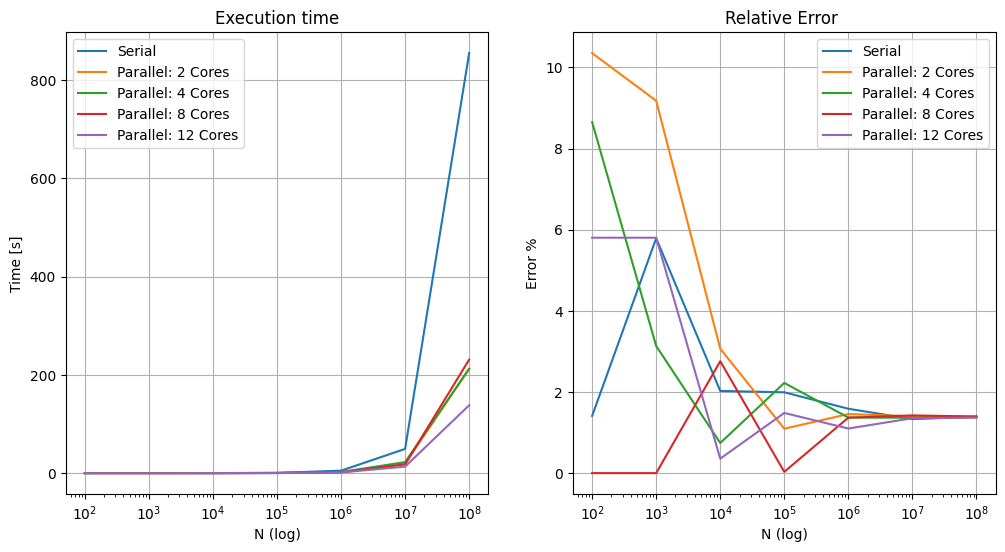

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

teo_val = 4297.69875 

# Define the suffixes for the filenames
suffixes = [2, 4, 8, 12]
parallel_arrays = []
par_time_arrays = []
error_par_arrays = []
i=0


#Load and process serial arrays
serial_array = np.array(pd.read_csv("mc_serial.csv",header=None))
N = serial_array[:, 0]
time_serial = serial_array[:, -1]
I_Serial = serial_array[:, 1] 
error_serial = np.abs(I_Serial - teo_val )/teo_val

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Plot serial arrays
ax1.plot(N, time_serial, label="Serial")
ax2.plot(N, error_serial*100, label="Serial")


# Load, process and plot parallel arrays
for i, suffix in enumerate(suffixes):
    
    filename = f"mc_parallel_{suffix}.csv"
    parallel_arrays.append(np.array(pd.read_csv(filename,header=None)))
    par_time_arrays.append(parallel_arrays[i][:, -1])
    I_Parallel = parallel_arrays[i][:, 1]
    error_par_arrays.append(np.abs(I_Parallel - teo_val )/teo_val)

    ax1.plot(N, par_time_arrays[i],  label=f"Parallel: {suffix} Cores")

    ax2.plot(N, error_par_arrays[i]*100, label=f"Parallel: {suffix} Cores")


ax1.set_xscale("log")
ax1.set_xlabel("N (log)")
ax1.set_ylabel("Time [s]")
ax1.set_title("Execution time")
ax1.legend()
ax1.grid()


ax2.set_xscale("log")
ax2.set_xlabel("N (log)")
ax2.set_ylabel("Error %")
ax2.set_title("Relative Error ")
ax2.legend()
ax2.grid()
